# OCR 개요
### 1. OCR이란
### 2. Tesseract란
* 2-1 Text 이미지<br>
* 2.2 워드 doc 이미지(한글 + 영어 추출)<br>
* 2.3 카드 이미지 

In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

## 1. OCR이란
* OCR(ptical Character Recognition)은 광학 문자 인식이라고 불리며 사람이 쓰거나 기계로 인쇄한 문자의 영상을 이미지 스캐너를 통해 기계가 읽을 수 있는 문자로 변환하는 것이다.
* OCR을 하기 위해 사용하는 대표적인 기술이 Tesseract이다.

## 2. Tesseract란
* Tesseract는 다양한 운영체제에서 사용할 수 있는 광학 문자 인식 엔진으로
* Tesseract OCR을 사용하는이유는 이미지에서 글자를 추출하고자 함이다.
* 아파치 라이센스 2.0을 따르는 무료 소프트웨어이며, 구글이 개발을 후원하고 있다.
* Tesseract 설치 가이드 : https://joyhong.tistory.com/79

### 2.1 Text 이미지
* 실습 이미지 : 
<img src=./datas/ocr03.png>

* 위의 이미지를 보면 뒷부분이 온전히 스캔이 되지 않음을 아래 결과를 통해 확인할  수 있다.
* 이를 바로 테서렉트로 텍스트를 추출해낼 수 있지만 우리의 눈으로 보이는 부분을 해결하지는 못한다.

In [3]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

original = pytesseract.image_to_string("./datas/ocr03.png")
print("--------------- original -----------------")
print(original)

--------------- original -----------------
Having just recently reviewed the ATI Radeo
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced
week until the Radeon 1-ID 5850 could be she
have finally dug up a production model from


* 해당 이미지의 경우에는 04.Binary Processing에서 학습한 **adaptive threshold를 이용**해 **이미지를 복원하고 작업을 하자**

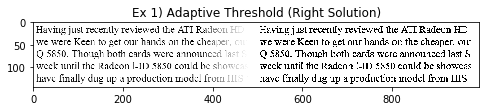

In [4]:
img = cv2.imread("./datas/ocr03.png", 0)
binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 21, 2)

cv2.imwrite("./datas/out.png", binary)
images = np.hstack([img, binary])
imshow("Ex 1) Adaptive Threshold (Right Solution)", images)

In [5]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

original = pytesseract.image_to_string("./datas/ocr03.png")
print("--------------- original -----------------")
print(original)

--------------- original -----------------
Having just recently reviewed the ATI Radeo
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced
week until the Radeon 1-ID 5850 could be she
have finally dug up a production model from


In [6]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

original = pytesseract.image_to_string("./datas/out.png")
print(original)

Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou”
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


### 2.2 워드 doc 이미지(한글 + 영어 추출)

English +      uae

In November 2015, we introduced the
Go Code of Conduct. It was developed
in a collaboration between the Go
team members at Google and the Go
‘community. | was fortunate to be one
of the community members invited to
participate in both drafting and then
enforcing the Go Code of Conduct.
Since then, we have learned two
lessons about limitations in our code of
conduct that restricted us from being
able to cultivate the safe culture
essential to Go's success

Korean >                                 ㅁ

 

2015 년 11 월에 Go Go of Conduct=
도입했습니다. Google2| Go 팀원과
GoARUE 간의 공동 작업으로 개발
되었습니다. 나는 행운의 행동 규범을
지키고 시행하는 데 참여하도록 초대
된 공동체 구성원 중 하나가되어 행운
이었다. 그 이루로 우리는 Goo] 성공에
필수적인 안전한 문화를 육성 할 수 없
도록 제한하는 행동 규범의 한계에 대
해 두 가지 BES 얻었습니다

2015 nyeon 11 wol-e Go Go of
Conductleul doibhaessseubnida.
Google-ui Go tim-wongwa Go



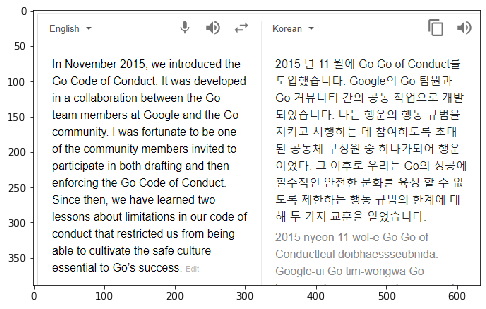

In [7]:
str = pytesseract.image_to_string("./datas/koreng.png", lang='kor+eng')
print(str + "\n")

img = cv2.imread("./datas/koreng.png")
imshow("", img)

#### ※ 참고사항
* 전경/ 배경을 구분해서 하는 것이 더 좋을 것이다.
* 박스 얻고 박스 내 전경과 배경을 나눈다.
* 글씨를 전경, 흰색은 배경으로 하는 생각을 하면서 하자.<br><br>

* 한자가 한글보다 인식률 높다. 분류하기가 어렵다. 영어는 아주 좋다.
* 필기체는 70%도 안되고 인쇄체가.. 굳굳!
* 자동차 번호판 인식에도 쓰이지만 그대로 가져다 쓸 수 가없다.segmentation을 잘하고 넘겨야 한다.

### 2.3 카드 이미지 
#### 카드 이미지 데이터를 통해 전처리 없는 Tessearact 사용의 문제점을 확인해보자.

Beh el a iee e ) ira)
Dey)

JOHN SMITH



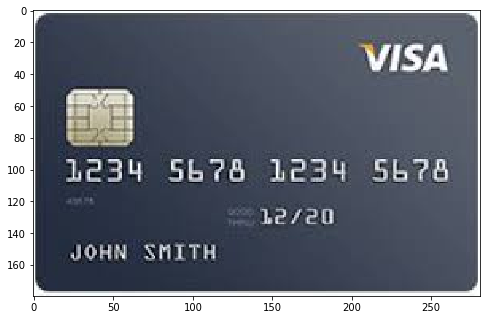

In [8]:
str = pytesseract.image_to_string("./datas/creditcard01.png")
print(str + "\n")

img = cv2.imread("./datas/creditcard01.png")
imshow("", img)

._ =

1234 5678 9O12 3456

cre)
Paai/Z:18)
iy



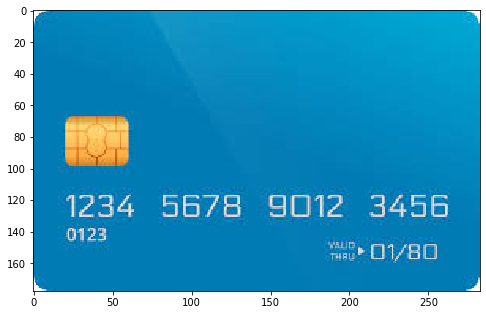

In [9]:
str = pytesseract.image_to_string("./datas/creditcard02.png")
print(str + "\n")

img = cv2.imread("./datas/creditcard02.png")
imshow("", img)

We

[NSS
Lt
ie

   

SY)



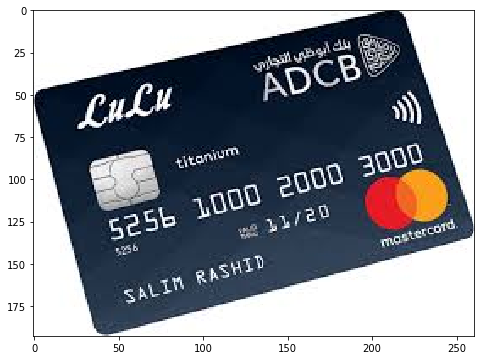

In [10]:
str = pytesseract.image_to_string("./datas/creditcard03.png")
print(str + "\n")

img = cv2.imread("./datas/creditcard03.png")
imshow("", img)

prererneocarouewser WISA



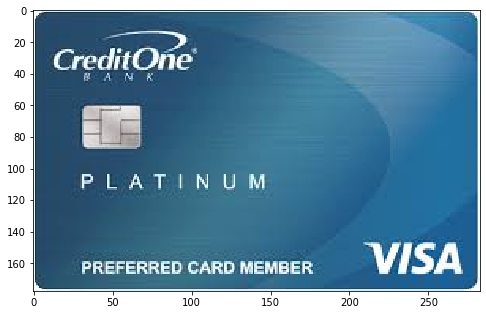

In [11]:
str = pytesseract.image_to_string("./datas/creditcard04.png")
print(str + "\n")

img = cv2.imread("./datas/creditcard04.png")
imshow("", img)

### 위의 문제들을 해결하기 위해서는!!
* 이럴 때는 바이너리로 전처리를 해줘야 한다.
* 글씨 크기가 크게해줘도 성능이 올라간다.
* 해상도가 낮으면 흑백으로 바꿔서 하는게 좋다.
* 필요 시 세그멘테이션도 해야한다.